# Introduction to Data Science with Python 
## General Assembly - 18th July 2017 Day 1##

This notebook contains exercises for getting started with network analysis in Python. The main topics we will cover in this class are:
1. Analysing a network
2. Plotting a network

In [1]:
# Install Networkx
! pip install networkx 

## What does the file look like?

In [6]:
! head -10 "/Users/jon/dat11syd/data/facebook_combined.txt"

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
G_fb = nx.read_edgelist("/Users/jon/dat11syd/data/facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [10]:
#Quick snapshot of the Network
print( nx.info(G_fb) )

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [11]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

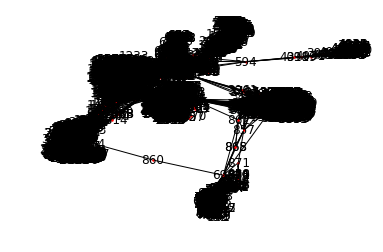

In [12]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = True, node_size = 2)

In [14]:
from multiprocessing import Pool
import itertools

In [15]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [16]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [17]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    print(part_generator)
    print(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [18]:
bt = between_parallel(G_fb)
top = 10

32
[<ForkProcess(ForkPoolWorker-1, started daemon)>, <ForkProcess(ForkPoolWorker-2, started daemon)>, <ForkProcess(ForkPoolWorker-3, started daemon)>, <ForkProcess(ForkPoolWorker-4, started daemon)>, <ForkProcess(ForkPoolWorker-5, started daemon)>, <ForkProcess(ForkPoolWorker-6, started daemon)>, <ForkProcess(ForkPoolWorker-7, started daemon)>, <ForkProcess(ForkPoolWorker-8, started daemon)>]


In [19]:
sorted(bt.items(), key = lambda v: -v[1])[:top]

[(107, 0.4805180785560149),
 (1684, 0.33779744973019526),
 (3437, 0.2361153573589285),
 (1912, 0.22929533958687437),
 (1085, 0.14901509211665456),
 (0, 0.14630592147442872),
 (698, 0.11533045020561002),
 (567, 0.09631033121856333),
 (58, 0.08436020590796531),
 (428, 0.06430906239323834)]

In [20]:
circular =nx.circular_layout(G_fb)

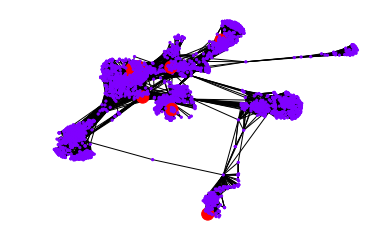

In [21]:
max_nodes =  sorted(bt.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos , cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)


## Extra Tasks##

1. Find the k-clique communities in this network
2. What is the centrality of node 14?
3. Run a hive plot of the data with 2 k-clique communities as the dimensions

In [25]:
# 1. K Cliques
# What is a clique? How do i find one?
# Link: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.community.kclique.k_clique_communities.html
# Hint:
import networkx as nx


c = list(nx.k_clique_communities(G_fb, 5))
c

AttributeError: module 'networkx' has no attribute 'k_clique_communities'

In [23]:
c

NameError: name 'c' is not defined

In [24]:
# 2. Centrality
# Link: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality
# Hint:
betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)


# 3. Hive Plot
# Link: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.circular_layout.html#networkx.drawing.layout.circular_layout
# Hint
G=nx.path_graph(4)
circular =nx.circular_layout(G)
nx.draw_networkx(G_fb, pos = circular, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

NameError: name 'betweenness_centrality' is not defined